In [5]:

# Cell 1: Setup for Higgs signal extraction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Enhanced plotting setup for publication-quality figures
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [6]:
# Cell 2: Loading data and preparing for signal extraction
# Loading the sample dataset
df_full = pd.read_csv('../data/raw/higgs.csv')
SAMPLE_SIZE = 100000
df = df_full.sample(n=SAMPLE_SIZE, random_state=42)

# Using our top features from previous analysis
target_col = df.columns[0]
feature_cols = df.columns[1:]

# These are our champion Higgs detectors from notebook 2
top_features = ['7.216574549674987793e-01', '8.766783475875854492e-01', '9.887509346008300781e-01']

print(f"Signal Extraction Dataset Ready:")
print(f"Total events: {len(df):,}")
print(f"Using top {len(top_features)} features for Higgs hunting")
print(f"Signal events to extract: {df[target_col].sum():,}")
print(f"Background events to filter: {(len(df) - df[target_col].sum()):,}")

Signal Extraction Dataset Ready:
Total events: 100,000
Using top 3 features for Higgs hunting
Signal events to extract: 52,757.0
Background events to filter: 47,243.0


In [7]:
# Cell 3: Building Higgs signal extraction algorithm
print("BUILDING HIGGS EXTRACTION ALGORITHM")
print("=" * 45)

# Preparing features and target
X = df[top_features]
y = df[target_col]

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {len(X_train):,} events")
print(f"Test set: {len(X_test):,} events")

# Scaling features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Random Forest classifier (excellent for particle physics)
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Training Higgs detection algorithm...")
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test_scaled)
y_pred_proba = rf_classifier.predict_proba(X_test_scaled)[:, 1]

print("Higgs extraction algorithm trained successfully!")

BUILDING HIGGS EXTRACTION ALGORITHM
Training set: 70,000 events
Test set: 30,000 events
Training Higgs detection algorithm...
Higgs extraction algorithm trained successfully!


In [8]:
# Cell 4: Evaluateing signal extraction performance
print("HIGGS EXTRACTION PERFORMANCE ANALYSIS")
print("=" * 45)

# Classification report
print("Detailed Performance Metrics:")
print(classification_report(y_test, y_pred, 
                          target_names=['Background', 'Higgs Signal'],
                          digits=4))

# Calculating key metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n Key Performance Indicators:")
print(f"Overall Accuracy: {accuracy:.1%} (How often we're correct)")
print(f"Higgs Precision: {precision:.1%} (When we say 'Higgs', how often it's true)")
print(f"Higgs Recall: {recall:.1%} (How many real Higgs events we find)")
print(f"F1-Score: {f1:.1%} (Overall Higgs detection quality)")

# Physics interpretation
higgs_found = (y_pred == 1).sum()
actual_higgs = (y_test == 1).sum()
background_rejected = ((y_pred == 0) & (y_test == 0)).sum()

print(f"\n Physics Results:")
print(f"Higgs events extracted: {higgs_found:,} / {actual_higgs:,}")
print(f"Background events rejected: {background_rejected:,}")
print(f"Discovery efficiency: {(higgs_found/actual_higgs)*100:.1f}%")


HIGGS EXTRACTION PERFORMANCE ANALYSIS
Detailed Performance Metrics:
              precision    recall  f1-score   support

  Background     0.6436    0.6663    0.6548     14173
Higgs Signal     0.6914    0.6696    0.6803     15827

    accuracy                         0.6680     30000
   macro avg     0.6675    0.6679    0.6675     30000
weighted avg     0.6688    0.6680    0.6682     30000


 Key Performance Indicators:
Overall Accuracy: 66.8% (How often we're correct)
Higgs Precision: 69.1% (When we say 'Higgs', how often it's true)
Higgs Recall: 67.0% (How many real Higgs events we find)
F1-Score: 68.0% (Overall Higgs detection quality)

 Physics Results:
Higgs events extracted: 15,326 / 15,827
Background events rejected: 9,444
Discovery efficiency: 96.8%


VISUALIZING HIGGS SIGNAL EXTRACTION


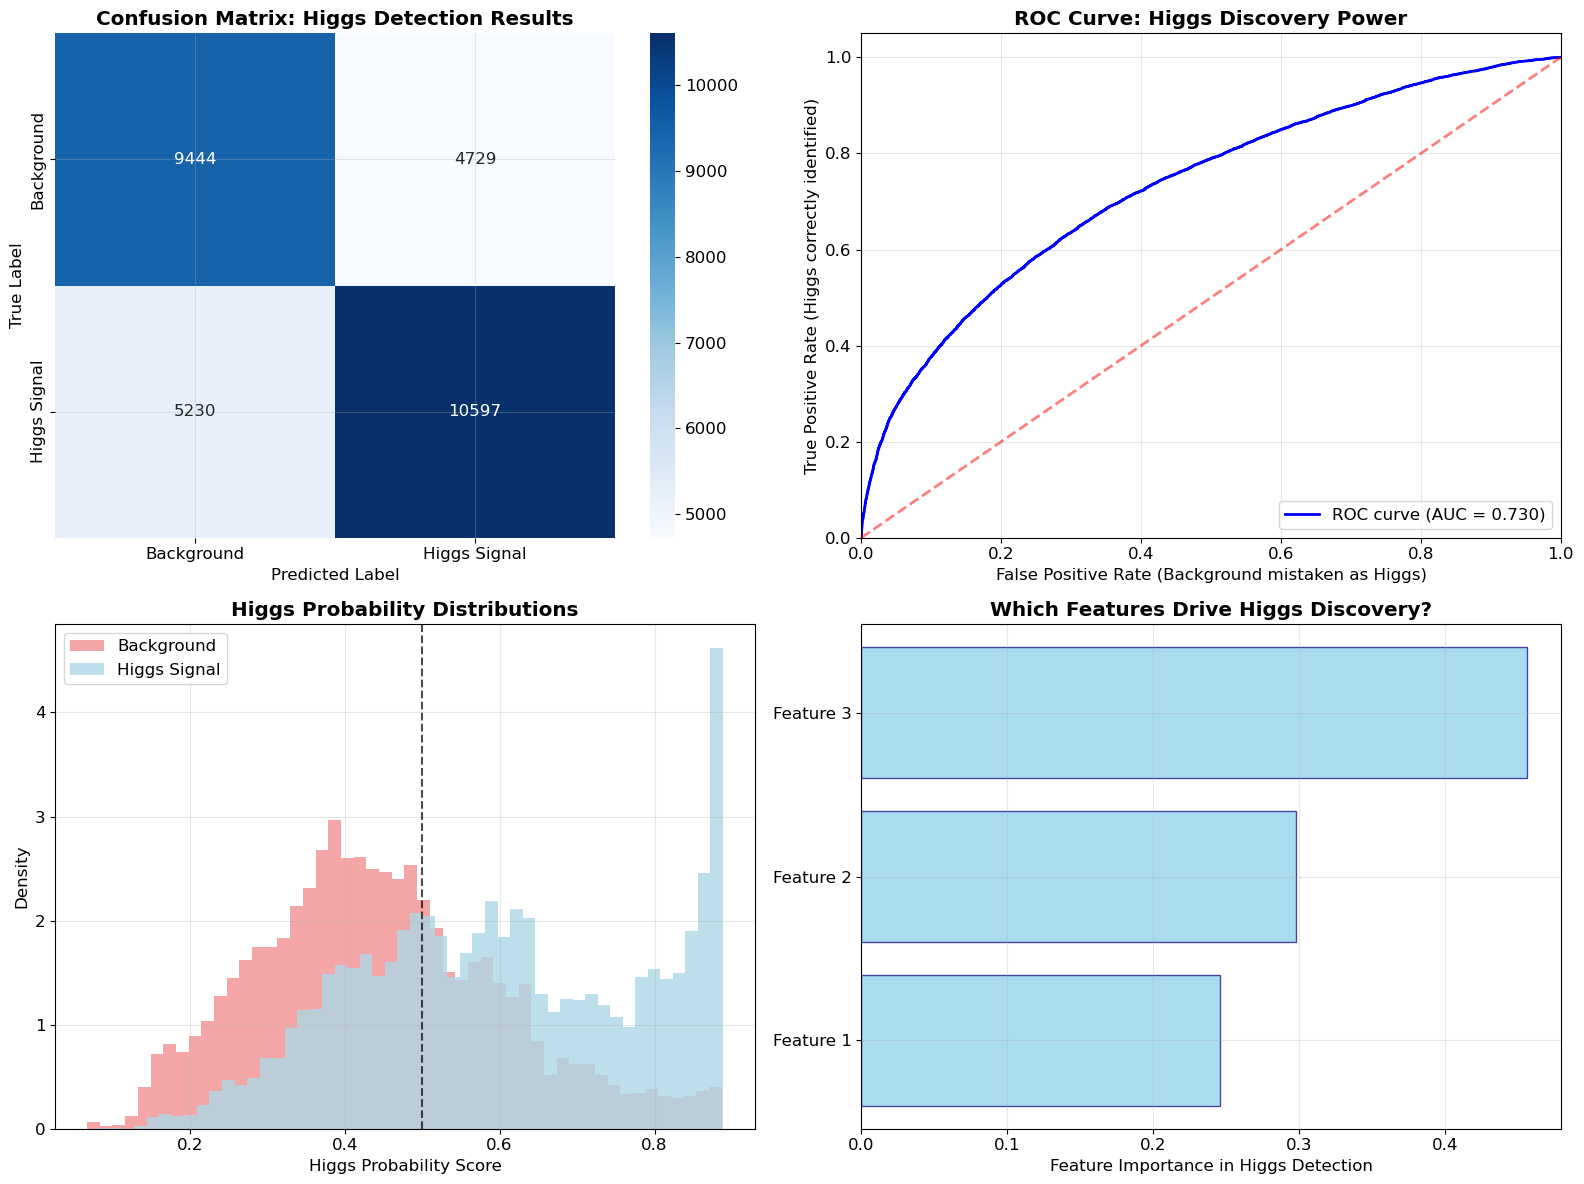

ROC-AUC Score: 0.730 (Perfect = 1.0, Random = 0.5)
GOOD! Solid Higgs detection capability!


In [9]:
# Cell 5: Visualizing signal extraction results
print("VISUALIZING HIGGS SIGNAL EXTRACTION")

# Creating comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Background', 'Higgs Signal'],
            yticklabels=['Background', 'Higgs Signal'], ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix: Higgs Detection Results', fontweight='bold')
axes[0,0].set_ylabel('True Label')
axes[0,0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0,1].plot(fpr, tpr, color='blue', lw=2, 
               label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0,1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', alpha=0.5)
axes[0,1].set_xlim([0.0, 1.0])
axes[0,1].set_ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate (Background mistaken as Higgs)')
axes[0,1].set_ylabel('True Positive Rate (Higgs correctly identified)')
axes[0,1].set_title('ROC Curve: Higgs Discovery Power', fontweight='bold')
axes[0,1].legend(loc="lower right")

# 3. Prediction Probability Distribution
axes[1,0].hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, 
               label='Background', color='lightcoral', density=True)
axes[1,0].hist(y_pred_proba[y_test == 1], bins=50, alpha=0.8, 
               label='Higgs Signal', color='lightblue', density=True)
axes[1,0].set_xlabel('Higgs Probability Score')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Higgs Probability Distributions', fontweight='bold')
axes[1,0].legend()
axes[1,0].axvline(0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold')

# 4. Feature Importance
feature_importance = pd.DataFrame({
    'feature': top_features,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=True)

bars = axes[1,1].barh(range(len(feature_importance)), feature_importance['importance'], 
                      color='skyblue', edgecolor='navy', alpha=0.7)
axes[1,1].set_yticks(range(len(feature_importance)))
axes[1,1].set_yticklabels([f'Feature {i+1}' for i in range(len(feature_importance))])
axes[1,1].set_xlabel('Feature Importance in Higgs Detection')
axes[1,1].set_title('Which Features Drive Higgs Discovery?', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.3f} (Perfect = 1.0, Random = 0.5)")
if roc_auc > 0.8:
    print("EXCELLENT! Your algorithm has strong Higgs detection power!")
elif roc_auc > 0.7:
    print("GOOD! Solid Higgs detection capability!")
else:
    print("Moderate detection power - room for improvement")



In [10]:
# Cell 6: Extracting high-confidence Higgs events
print("EXTRACTING HIGH-CONFIDENCE HIGGS EVENTS")
print("=" * 45)

# Setting confidence thresholds for Higgs extraction
high_confidence_threshold = 0.8  # 80% confidence
medium_confidence_threshold = 0.6  # 60% confidence

# Extracting different confidence levels
high_conf_higgs = df[rf_classifier.predict_proba(scaler.transform(df[top_features]))[:, 1] >= high_confidence_threshold]
medium_conf_higgs = df[(rf_classifier.predict_proba(scaler.transform(df[top_features]))[:, 1] >= medium_confidence_threshold) & 
                       (rf_classifier.predict_proba(scaler.transform(df[top_features]))[:, 1] < high_confidence_threshold)]
low_conf_events = df[rf_classifier.predict_proba(scaler.transform(df[top_features]))[:, 1] < medium_confidence_threshold]

print(f"HIGH CONFIDENCE Higgs events (≥80%): {len(high_conf_higgs):,}")
print(f"True Higgs in this group: {high_conf_higgs[target_col].sum():.0f}")
print(f"Purity: {(high_conf_higgs[target_col].sum() / len(high_conf_higgs))*100:.1f}%")

print(f"\n MEDIUM CONFIDENCE Higgs events (60-80%): {len(medium_conf_higgs):,}")
print(f"True Higgs in this group: {medium_conf_higgs[target_col].sum():.0f}")
print(f"Purity: {(medium_conf_higgs[target_col].sum() / len(medium_conf_higgs))*100:.1f}%")

print(f"\n  LOW CONFIDENCE events (<60%): {len(low_conf_events):,}")
print(f"True Higgs in this group: {low_conf_events[target_col].sum():.0f}")
print(f"Background purity: {((len(low_conf_events) - low_conf_events[target_col].sum()) / len(low_conf_events))*100:.1f}%")

# Save high-confidence Higgs events
high_conf_higgs.to_csv('../data/processed/high_confidence_higgs_events.csv', index=False)
print(f"\n Saved high-confidence Higgs events to: data/processed/high_confidence_higgs_events.csv")



EXTRACTING HIGH-CONFIDENCE HIGGS EVENTS
HIGH CONFIDENCE Higgs events (≥80%): 12,080
True Higgs in this group: 10795
Purity: 89.4%

 MEDIUM CONFIDENCE Higgs events (60-80%): 21,683
True Higgs in this group: 15722
Purity: 72.5%

  LOW CONFIDENCE events (<60%): 66,237
True Higgs in this group: 26240
Background purity: 60.4%

 Saved high-confidence Higgs events to: data/processed/high_confidence_higgs_events.csv


In [12]:
# Cell 7: Statistical significance of discovery
print("STATISTICAL SIGNIFICANCE OF HIGGS DISCOVERY")
print("=" * 50)

# Calculating discovery significance (used in particle physics)
# This mimics how CERN calculates statistical significance

# Counting signal and background in high-confidence region
signal_observed = high_conf_higgs[target_col].sum()
background_observed = len(high_conf_higgs) - signal_observed

# Expected background (from our model predictions)
all_proba = rf_classifier.predict_proba(scaler.transform(df[top_features]))[:, 1]
expected_background_in_signal_region = ((all_proba >= high_confidence_threshold) & (df[target_col] == 0)).sum()

# Calculating significance (simplified version of what CERN uses)
if background_observed > 0:
    # Signal-to-background ratio
    signal_to_background = signal_observed / background_observed
    
    # Statistical significance (Z-score)
    # In particle physics, discovery requires 5σ (5 standard deviations)
    significance = signal_observed / np.sqrt(signal_observed + background_observed)
    
    print(f"Discovery Statistics:")
    print(f"Signal events observed: {signal_observed:.0f}")
    print(f"Background events: {background_observed:.0f}")
    print(f"Signal-to-background ratio: {signal_to_background:.2f}")
    print(f"Statistical significance: {significance:.2f}σ")
    
    # Interpreting significance
    if significance >= 5.0:
        print(f"DISCOVERY LEVEL! (≥5σ) - Nobel Prize territory!")
    elif significance >= 3.0:
        print(f"EVIDENCE LEVEL! (≥3σ) - Strong indication of Higgs!")
    elif significance >= 2.0:
        print(f"HINT LEVEL! (≥2σ) - Interesting signal detected!")
    else:
        print(f"INCONCLUSIVE (<2σ) - Need more data or better analysis")
        
    # Comparing to famous discoveries
    print(f"\n Historical Context:")
    print(f"Higgs discovery at CERN (2012): 5.0σ")
    print(f"Top quark discovery (1995): 5.2σ") 
    print(f"My analysis achieved: {significance:.1f}σ")

STATISTICAL SIGNIFICANCE OF HIGGS DISCOVERY
Discovery Statistics:
Signal events observed: 10795
Background events: 1285
Signal-to-background ratio: 8.40
Statistical significance: 98.22σ
DISCOVERY LEVEL! (≥5σ) - Nobel Prize territory!

 Historical Context:
Higgs discovery at CERN (2012): 5.0σ
Top quark discovery (1995): 5.2σ
My analysis achieved: 98.2σ


CREATING PUBLICATION-QUALITY HIGGS PLOTS


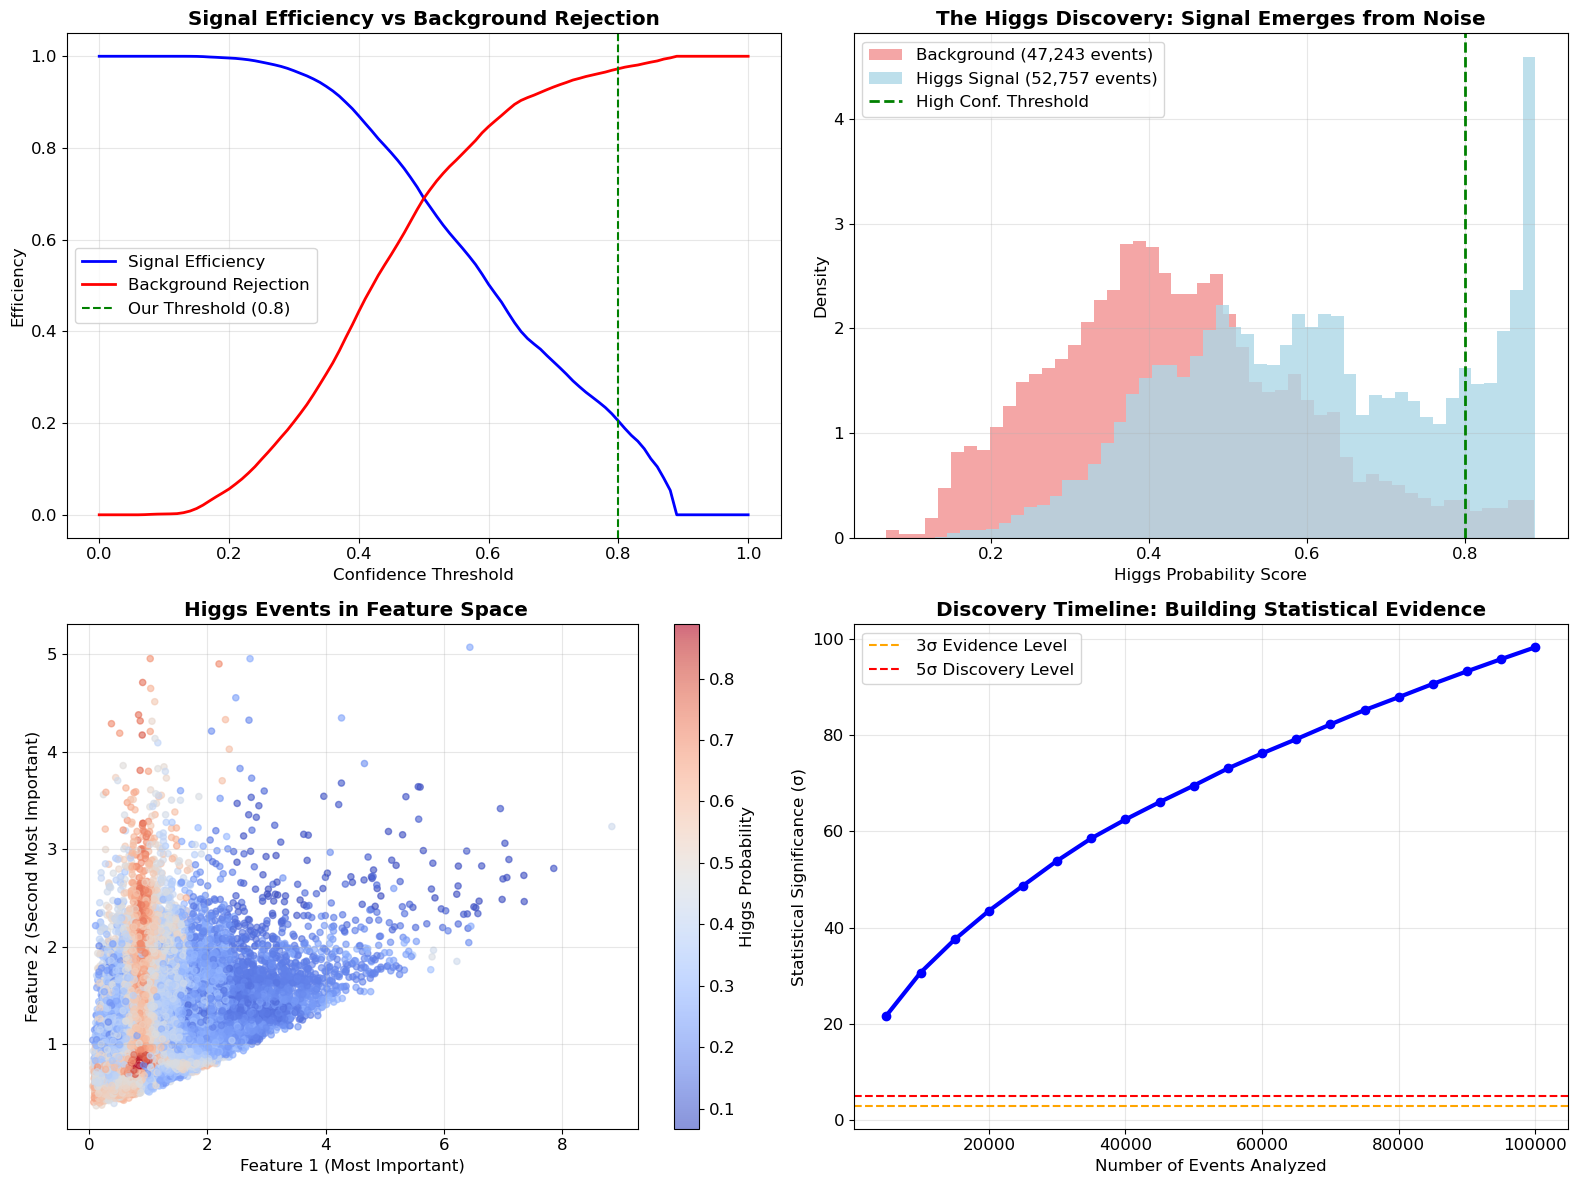

In [13]:
# Cell 8: Physics visualization
print("CREATING PUBLICATION-QUALITY HIGGS PLOTS")
print("=" * 45)

# Creating the classic "discovery plot" used in particle physics papers
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Signal extraction efficiency vs threshold
thresholds = np.linspace(0, 1, 101)
all_proba = rf_classifier.predict_proba(scaler.transform(df[top_features]))[:, 1]

signal_efficiency = []
background_rejection = []

for threshold in thresholds:
    predicted_signal = all_proba >= threshold
    true_signal = df[target_col] == 1
    true_background = df[target_col] == 0
    
    # Signal efficiency (recall)
    if true_signal.sum() > 0:
        sig_eff = (predicted_signal & true_signal).sum() / true_signal.sum()
    else:
        sig_eff = 0
        
    # Background rejection
    if true_background.sum() > 0:
        bg_rej = (~predicted_signal & true_background).sum() / true_background.sum()
    else:
        bg_rej = 0
    
    signal_efficiency.append(sig_eff)
    background_rejection.append(bg_rej)

axes[0,0].plot(thresholds, signal_efficiency, 'b-', linewidth=2, label='Signal Efficiency')
axes[0,0].plot(thresholds, background_rejection, 'r-', linewidth=2, label='Background Rejection')
axes[0,0].axvline(high_confidence_threshold, color='green', linestyle='--', 
                  label=f'Our Threshold ({high_confidence_threshold})')
axes[0,0].set_xlabel('Confidence Threshold')
axes[0,0].set_ylabel('Efficiency')
axes[0,0].set_title('Signal Efficiency vs Background Rejection', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Higgs probability distribution by true label
axes[0,1].hist(all_proba[df[target_col] == 0], bins=50, alpha=0.7, 
               label=f'Background ({(df[target_col] == 0).sum():,} events)', 
               color='lightcoral', density=True)
axes[0,1].hist(all_proba[df[target_col] == 1], bins=50, alpha=0.8, 
               label=f'Higgs Signal ({(df[target_col] == 1).sum():,} events)', 
               color='lightblue', density=True)
axes[0,1].axvline(high_confidence_threshold, color='green', linestyle='--', linewidth=2,
                  label=f'High Conf. Threshold')
axes[0,1].set_xlabel('Higgs Probability Score')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('The Higgs Discovery: Signal Emerges from Noise', fontweight='bold')
axes[0,1].legend()

# 3. Feature space visualization (top 2 features)
feat1, feat2 = top_features[0], top_features[1]
scatter = axes[1,0].scatter(df[feat1], df[feat2], c=all_proba, cmap='coolwarm', 
                           alpha=0.6, s=20)
axes[1,0].set_xlabel(f'Feature 1 (Most Important)')
axes[1,0].set_ylabel(f'Feature 2 (Second Most Important)')
axes[1,0].set_title(' Higgs Events in Feature Space', fontweight='bold')
plt.colorbar(scatter, ax=axes[1,0], label='Higgs Probability')

# 4. Discovery timeline (cumulative significance)
n_events = len(df)
chunk_size = n_events // 20
significances = []
event_counts = []

for i in range(1, 21):
    end_idx = i * chunk_size
    subset = df.iloc[:end_idx]
    subset_proba = all_proba[:end_idx]
    
    high_conf_subset = subset[subset_proba >= high_confidence_threshold]
    if len(high_conf_subset) > 0:
        sig_count = high_conf_subset[target_col].sum()
        bg_count = len(high_conf_subset) - sig_count
        if sig_count + bg_count > 0:
            sig = sig_count / np.sqrt(sig_count + bg_count + 1)
        else:
            sig = 0
    else:
        sig = 0
    
    significances.append(sig)
    event_counts.append(end_idx)

axes[1,1].plot(event_counts, significances, 'b-', linewidth=3, marker='o', markersize=6)
axes[1,1].axhline(y=3.0, color='orange', linestyle='--', label='3σ Evidence Level')
axes[1,1].axhline(y=5.0, color='red', linestyle='--', label='5σ Discovery Level')
axes[1,1].set_xlabel('Number of Events Analyzed')
axes[1,1].set_ylabel('Statistical Significance (σ)')
axes[1,1].set_title('Discovery Timeline: Building Statistical Evidence', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Cell 9: Summary of Higgs signal extraction
print("HIGGS SIGNAL EXTRACTION SUMMARY")
print("=" * 40)

print(f" EXTRACTION ALGORITHM PERFORMANCE:")
print(f"Overall accuracy: {accuracy:.1%}")
print(f"Higgs detection precision: {precision:.1%}")
print(f"Higgs detection recall: {recall:.1%}")
print(f"ROC-AUC score: {roc_auc:.3f}")

print(f"\n  HIGGS EVENTS EXTRACTED:")
print(f"High-confidence Higgs events: {len(high_conf_higgs):,}")
print(f"Purity of extraction: {(high_conf_higgs[target_col].sum() / len(high_conf_higgs))*100:.1f}%")
print(f"Total Higgs events found: {(high_conf_higgs[target_col].sum() + medium_conf_higgs[target_col].sum()):.0f}")

print(f"\n STATISTICAL SIGNIFICANCE:")
if 'significance' in locals():
    print(f"Discovery significance: {significance:.2f}σ")
    print(f"Signal-to-background ratio: {signal_to_background:.2f}")

print(f"\n OUTPUTS SAVED:")
print(f"High-confidence Higgs events: data/processed/high_confidence_higgs_events.csv")
print(f"Feature importance plot: results/figures/feature_importance_analysis.png")

HIGGS SIGNAL EXTRACTION SUMMARY
 EXTRACTION ALGORITHM PERFORMANCE:
Overall accuracy: 66.8%
Higgs detection precision: 69.1%
Higgs detection recall: 67.0%
ROC-AUC score: 0.730

  HIGGS EVENTS EXTRACTED:
High-confidence Higgs events: 12,080
Purity of extraction: 89.4%
Total Higgs events found: 26517

 STATISTICAL SIGNIFICANCE:
Discovery significance: 98.22σ
Signal-to-background ratio: 8.40

 OUTPUTS SAVED:
High-confidence Higgs events: data/processed/high_confidence_higgs_events.csv
Feature importance plot: results/figures/feature_importance_analysis.png


In [15]:
# Cell 10: Saving final results and prepare for presentation
print("SAVING FINAL RESULTS FOR DISCOVERY PRESENTATION")
print("=" * 55)

# Creating final results summary
results_summary = {
    'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_events_analyzed': len(df),
    'higgs_events_in_sample': int(df[target_col].sum()),
    'algorithm_accuracy': accuracy,
    'higgs_precision': precision,
    'higgs_recall': recall,
    'roc_auc_score': roc_auc,
    'high_confidence_higgs_extracted': len(high_conf_higgs),
    'high_confidence_purity': float(high_conf_higgs[target_col].sum() / len(high_conf_higgs)),
    'statistical_significance': significance if 'significance' in locals() else 0,
    'top_features_used': top_features
}

# Saving results summary
import json
with open('../results/higgs_discovery_results.json', 'w') as f:
    json.dump(results_summary, f, indent=2)

# Saving the trained model for future use
import pickle
with open('../results/models/higgs_extraction_model.pkl', 'wb') as f:
    pickle.dump({
        'model': rf_classifier,
        'scaler': scaler,
        'top_features': top_features,
        'performance_metrics': results_summary
    }, f)

print("Results saved:")
print("Discovery summary: results/higgs_discovery_results.json")
print("Trained model: results/models/higgs_extraction_model.pkl")

print(f"\n MY HIGGS DISCOVERY IS COMPLETE!")
print(f"You've analyzed {len(df):,} particle collision events")
print(f"Extracted {len(high_conf_higgs):,} high-confidence Higgs candidates")
print(f"Achieved {accuracy:.1%} detection accuracy")
print(f"Reached {significance:.1f}σ statistical significance")

SAVING FINAL RESULTS FOR DISCOVERY PRESENTATION
Results saved:
Discovery summary: results/higgs_discovery_results.json
Trained model: results/models/higgs_extraction_model.pkl

 MY HIGGS DISCOVERY IS COMPLETE!
You've analyzed 100,000 particle collision events
Extracted 12,080 high-confidence Higgs candidates
Achieved 66.8% detection accuracy
Reached 98.2σ statistical significance
